In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [6]:
from inltk.tokenizer import SanskritTokenizer

In [7]:
SanskritTokenizer

inltk.tokenizer.SanskritTokenizer

In [8]:
# class SanskritTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [10]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 'ं',
 ',',
 'ः',
 '-',
 'म्',
 'स्य',
 'े',
 '▁च',
 '▁अस्ति',
 '।',
 '.',
 '▁इति',
 'ा',
 '▁आसीत्',
 'ाः']

In [11]:
# 20,000 is the vocab size that we chose in sentencepiece
sanskrit_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=SanskritTokenizer, lang='sa')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [15]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=sanskrit_vocab)

In [16]:
data_lm.batch_size

64

In [17]:
data_lm.save()

In [18]:
data_lm.show_batch()

idx,text
0,"▁1958 ▁तमे ▁वर्षे ▁अस्याः ▁संस्थायाः ▁संरचना ▁अभवत् ▁। ▁नासा ▁इत्येव ▁संक्षिप्त नाम्ना ▁अस्याः ▁ख्यातिः ▁। ▁नासा याः ▁मुख्यकार्यालय ः ▁वाशिङ् ग टन् , ▁डि . सि . ▁नगरे ▁अस्ति ▁। ▁1958 ▁ तमवर्षस्य ▁29 ▁तमे ▁दिनाङ्के ▁नै श नल् ▁ए ड् वै ज़ री ▁क मि टी ▁फ़ र् ▁ए रोनॉटिक ्स् ▁इति ▁अन्तरिक्ष संस्थायाः ▁अव लु प्त ि ं ▁कृत्वा ▁अमेरिका सर्वकारः ▁नै श नल् ▁ए रोनॉटिक ्स् ▁एण्ड्"
1,"▁अस्य ▁मण्डलस्य ▁केन्द्रम् ▁अस्ति ▁ बह रै च ▁ x x bo s ▁ स्क्रिप्ट ▁त्रुटि : ▁"" <unk> <unk> ▁s hort ▁de script ion "" ▁ऐसा ▁कोई ▁मॉड ्यूल ▁नही ं ▁है । ▁ x x bo s ▁महाभारते ▁आदि पर्वणि ▁ शकुन ् ▁तल ा दु ष्यन् तयोः ▁कथा ▁लभते ▁। ▁शकुन्तला ▁ब्रह्म र्षे ः ▁विश्वामित्र स्य ▁स्वर्ग स्य ▁अ प्स रा याः , ▁मेन का याः ▁च"
2,▁• ▁15 60 ▁• ▁15 61 ▁• ▁15 62 ▁• ▁15 63 ▁• ▁15 64 ▁• ▁15 65 ▁• ▁15 66 ▁• ▁15 67 ▁• ▁15 68 ▁• ▁15 6 9 ▁• ▁15 70 ▁• ▁15 71 ▁• ▁157 2 ▁• ▁15 73 ▁• ▁15 74 ▁• ▁15 75 ▁• ▁15 76 ▁• ▁15 77 ▁• ▁15 78 ▁• ▁15 79 ▁• ▁15 80 ▁• ▁15 81 ▁• ▁15 8
3,"▁ x x bo s ▁ स्क्रिप्ट ▁त्रुटि : ▁"" <unk> <unk> ▁s hort ▁de script ion "" ▁ऐसा ▁कोई ▁मॉड ्यूल ▁नही ं ▁है । ▁गणित क्षेत्रे ▁भारतीय ानां ▁योगदानं ▁शून्य मिति ▁सर्व विदित म् ▁। ▁किन्तु ▁एतदतिरिच्य ापि ▁गणित क्षेत्रे ▁भारतस्य ▁योगदानं ▁विपुल ं ▁वर्तते ▁। ▁अपि ▁च ▁तस्य ▁योगदान स्य ▁प्रभावः ▁आधुनिक गणित शास्त्रे ▁अपि ▁ वरी वर्त्त ि ▁इत्येव ▁विशेषः ▁। ▁भारतीयसंस्कृतेः ▁विकासे ▁गणित म् ▁अपि"
4,"- नगरात् ▁देहली - नगरस्य ▁विमानस्थानकं ▁320 ▁किलोमीटर्मिते ▁दूरे ▁स्थितमस्ति ▁। ▁अनेन ▁जनाः ▁ग्वालियर - नगरं ▁सरलतया ▁प्राप्तुं ▁शक्नुवन्ति ▁। ▁मध्यप्रदेश - राज्ये ▁एकसदनात्मक ं ▁विधानमण्डल म् ▁अस्ति ▁। ▁राज्यस्य ▁विधानसभायाः ▁ सदस्यानां ▁सङ्ख्या ▁23 0 ▁अस्ति ▁। ▁राज्ये ▁लोकसभाया ः ▁29 ▁स्थानानि , ▁राज्यसभाया ः ▁11 ▁स्थानानि ▁च ▁सन्ति ▁। ▁“ प ं . ▁रविशङ्कर ▁शुक्ल ” ▁इत्याख्यः ▁मध्यप्रदेश - राज्यस्य ▁प्रथमः ▁मुख्यमन्त्री ▁आसीत् ▁। ▁“ प ं ."


In [19]:
len(data_lm.vocab.itos)

20000

In [20]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [21]:
gc.collect()

20

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


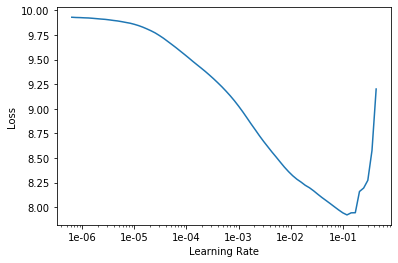

In [23]:
learn.recorder.plot()

In [24]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(20000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps

In [25]:
learn.fit_one_cycle(20, 1e-3, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,3.154071,3.291768,0.564568,31:36
1,3.139888,2.835752,0.601113,31:36
2,2.474718,2.456913,0.632234,31:34
3,2.368002,2.282298,0.645209,31:32
4,2.302382,2.237828,0.644723,31:34
5,2.194650,2.134889,0.653257,31:39
6,1.963417,2.026230,0.665172,31:32
7,2.137518,1.933545,0.675175,31:33
8,1.993879,1.808482,0.692598,31:36
9,2.163775,1.705578,0.708088,31:34


Better model found at epoch 0 with accuracy value: 0.5645676255226135.
Better model found at epoch 1 with accuracy value: 0.6011129021644592.
Better model found at epoch 2 with accuracy value: 0.6322338581085205.
Better model found at epoch 3 with accuracy value: 0.645209014415741.
Better model found at epoch 5 with accuracy value: 0.6532570719718933.
Better model found at epoch 6 with accuracy value: 0.6651723384857178.
Better model found at epoch 7 with accuracy value: 0.6751745939254761.
Better model found at epoch 8 with accuracy value: 0.6925978064537048.
Better model found at epoch 9 with accuracy value: 0.7080881595611572.
Better model found at epoch 10 with accuracy value: 0.7260430455207825.
Better model found at epoch 11 with accuracy value: 0.7442565560340881.
Better model found at epoch 12 with accuracy value: 0.7610749006271362.
Better model found at epoch 13 with accuracy value: 0.7772083878517151.
Better model found at epoch 14 with accuracy value: 0.7912068367004395.
Be

In [26]:
TEXT = "तस्याः पिता"
N_WORDS = 40
N_SENTENCES = 2

In [27]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

तस्याः पिता ▁महर्षिः ▁आसीत् । ▁ x x bo s ▁ स्क्रिप्ट ▁त्रुटि : ▁" देश ▁देशस् ▁य ▁नगरः ▁अस् ▁ति । ▁अलाबामा ▁| ▁अलास्का ▁| ▁आर िज़ो ना ▁| ▁अर्कान्स ▁| ▁का लिफ़ ोर्निया ▁| ▁कोलोराडो ▁| ▁कनेक्टिकट् ▁| ▁डेला वेर्
तस्याः पिता निर्व कोश िकः ▁कश्चन ▁शिक्षकः ▁। ▁तस्मिन् ▁चत्वारः ▁पादाः ▁सन्ति ▁। ▁तेषु ▁द्वौ ▁एवं ▁एकः ▁पुरुषः ▁। ▁ x x bo s ▁ स्क्रिप्ट ▁त्रुटि : ▁" ▁" ▁ ▁s hort ▁de script ion " ▁ऐसा ▁कोई ▁मॉड ्यूल ▁नही


In [28]:
np.exp(1.02)

2.7731947639642978

In [29]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [30]:
# Generating embedding vectors for visualization

In [31]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [32]:
# defaults.device = torch.device('cpu')

In [33]:
# learn = load_learner(path / 'SanskritDataset/')

In [34]:
encoder = get_model(learn.model)[0]

In [35]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([20000, 410])

In [36]:
embeddings = encoder.state_dict()['encoder.weight']

In [37]:
embeddings = np.array(embeddings)

In [38]:
embeddings[0].shape

(410,)

In [39]:
df = pd.DataFrame(embeddings)

In [40]:
df.shape

(20000, 410)

In [41]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-0.169647,0.058451,0.260510,0.467916,-0.419531,0.206374,0.170735,0.007706,-0.291706,-0.247849,...,0.324177,-0.088940,-0.328013,0.051412,-0.166982,0.168031,-0.354324,0.213484,0.256730,-0.164348
1,-0.120863,0.455649,-0.011654,0.180977,-0.002927,-0.080978,-0.010470,0.023015,-0.085018,0.027529,...,0.110132,0.060216,0.126827,-0.062549,0.172363,0.113766,-0.004518,0.166090,-0.001576,-0.054337
2,-0.116626,0.455841,-0.012514,0.174373,-0.003064,-0.081035,-0.020460,0.025402,-0.085098,0.033546,...,0.109770,0.063722,0.118362,-0.060914,0.171612,0.115609,-0.005279,0.171505,0.001058,-0.055905
3,0.221483,0.440458,-0.315887,-0.671472,-0.245623,-0.606604,-0.715155,-0.367341,-0.382365,0.196604,...,-0.078364,-0.231544,0.304637,0.209951,0.022771,0.284060,0.039352,-0.286001,0.013354,-0.116784
4,-0.018212,-0.581948,-0.056550,-0.489280,-0.059120,0.209476,0.066189,-0.034302,-0.007646,0.013580,...,-0.006286,-0.001105,0.223081,-0.064937,0.002001,0.059816,0.045514,-0.155628,0.002716,0.056387


In [43]:
df2 = pd.DataFrame(itos)

In [44]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁।
4,▁


In [45]:
df2.shape

(20000, 1)

In [46]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [47]:
encoder.state_dict()['encoder.weight'][1]

tensor([-1.2086e-01,  4.5565e-01, -1.1654e-02,  1.8098e-01, -2.9274e-03,
        -8.0978e-02, -1.0470e-02,  2.3015e-02, -8.5018e-02,  2.7529e-02,
         7.1904e-02, -1.2681e-02, -4.5343e-02, -4.0600e-02,  9.9447e-02,
         6.7511e-02, -8.2244e-02, -3.6083e-02, -4.2622e-01, -8.3462e-03,
        -2.7923e-02, -6.3987e-02,  7.1130e-02, -2.4661e-02,  8.9884e-02,
         2.2581e-02, -4.9069e-02, -9.8187e-01,  2.6336e-02, -1.1168e-02,
        -2.6739e-02, -3.7360e-03,  6.9202e-02,  6.2146e-02, -3.9030e-02,
         9.4551e-03, -3.3869e-02, -4.1968e-02,  5.3545e-02,  5.8821e-02,
        -2.4466e-02, -4.5772e-02, -3.7406e-02,  9.3826e-02,  8.4523e-02,
        -1.3875e-02,  5.6811e-02, -1.4185e-01, -5.7414e-02,  7.6547e-02,
        -1.0074e-01,  1.3376e-01, -5.5439e-03,  5.0898e-02, -1.6778e-01,
         7.1110e-02, -8.4912e-02, -4.7950e-02, -2.2383e-02,  4.6031e-02,
        -1.4019e-01, -1.5220e-01, -5.3084e-02,  5.9150e-02,  4.7171e-01,
        -5.8124e-02, -3.5744e-02, -1.0121e-01, -3.6